오차 수정
===
경사 하강법
---
### 1. 경사 하강법의 개요
* a를 무한대로 키우거나 a를 무한대로 작게 할 때 오차도 무한대로 커지는 관계를 이차함수 그래프로 표현할 수 있음.
$$y=ax+b$$
<center>

평균제곱오차$(MSE) = \frac{1}{n}\Sigma(\hat{y}_i-y_i)^2$
</center>

* 컴퓨터를 이용해 optimum을 찾으려면 임의의 한 점 $a_1$을 찍고, 이 점을 optimum에 가까운 쪽으로 점점 이동시키는 과정$(a_1 \rarr a_2 \rarr a_3)$이 필요함.
* 경사 하강법(gradient descent)   
  : 미분 기울기를 이용해서 그래프에서 오차를 비교하여 가장 작은 방향으로 이동시키는 방법.
  * 순간 변화율이 $0$인 점이 optimum.(2차 함수의 경우.)
  * $\therefore$ 임의의 점 $a_1$의 미분 값이 양$(+)$이면 음의 방향, 미분 값이 음$(-)$이면 양의 방향으로 얼마간 이동시킨 $a_2$에서 또다시 미분 값을 구함.
  * 이 과정을 반복해 기울기가 $0$인 optimum을 찾음. 
### 2. 학습률(Learning Rate)
* 학습률(learning rate)   
  : 어느 만큼 이동시킬지를 신중히 결정해야 하는데, 이때 이동 거리를 정해주는 것.
* DL에서 학습률의 값을 적절히 바꾸면서 최적의 학습률을 찾는 것은 중요한 __최적화(optimization)__ 과정.

$$MSE = \frac{1}{n}\sum(\hat{y}_i-y_i)^2$$
$$\frac{1}{n}\Sigma(\hat{y}_i-y_i)^2 = \frac{1}{n}\Sigma((ax_i+b)-y_i)^2, (\because\hat{y}_i = ax_i+b)$$
<center>

$a$로 편미분 한 결과 : $\frac{\partial{MSE}}{\partial{a}}=\frac{2}{n}\sum(ax_i+b-y_i)x_i$
</center>
<center>

$b$로 편미분 한 결과 : $\frac{\partial{MSE}}{\partial{b}}=\frac{2}{n}\sum(ax_i+b-y_i)$
</center>

### 3. 코딩으로 확인하는 경사 하강법

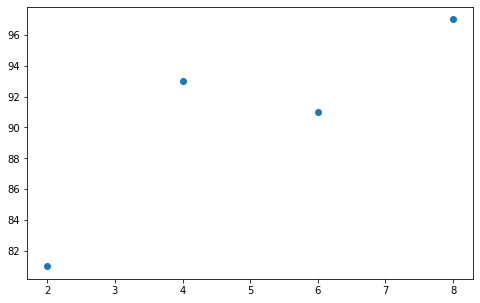

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 공부시간 x와 성적 y의 리스트를 만듦
data = [[2,81], [4,93], [6,91], [8,97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

# 그래프로 나타냄.
plt.figure(figsize=(8,5))
plt.scatter(x,y)
plt.show()

In [16]:
# 리스트로 되어 있는 x와 y값을 넘파이 배열로 바꾸어 줌.
# 인덱스를 주어 하나씩 불러와 계산이 가능하도록 하기 위함.

x_data = np.array(x)
y_data = np.array(y)

# 기울기 a와 절편 b의 값을 초기화 함
a = 0
b = 0

# 학습률을 결정
lr = 0.03

# 반복 횟수 결정. 오차수정(경사하강법) 횟수
epochs = 2001

# 경사 하강법을 시작
for i in range(epochs) :
    y_hat = a * x_data + b
    error = y_data - y_hat
    a_diff = -(2/len(x_data)) * sum(x_data * (error))   # 오차함수를 a로 미분한 값.
    b_diff = -(2/len(x_data)) * sum(error)    # 오차함수를 b로 미분한 값.
    a = a - lr * a_diff # 학습률을 반영하여 업데이트
    b = b - lr * b_diff
    if i % 100 == 0 :
        print(f"epoch={i}, 기울기={a:.3f}, 절편={b:.4f}")

epoch=0, 기울기=27.840, 절편=5.4300
epoch=100, 기울기=7.074, 절편=50.5117
epoch=200, 기울기=4.096, 절편=68.2822
epoch=300, 기울기=2.976, 절편=74.9678
epoch=400, 기울기=2.554, 절편=77.4830
epoch=500, 기울기=2.396, 절편=78.4293
epoch=600, 기울기=2.336, 절편=78.7853
epoch=700, 기울기=2.314, 절편=78.9192
epoch=800, 기울기=2.305, 절편=78.9696
epoch=900, 기울기=2.302, 절편=78.9886
epoch=1000, 기울기=2.301, 절편=78.9957
epoch=1100, 기울기=2.300, 절편=78.9984
epoch=1200, 기울기=2.300, 절편=78.9994
epoch=1300, 기울기=2.300, 절편=78.9998
epoch=1400, 기울기=2.300, 절편=78.9999
epoch=1500, 기울기=2.300, 절편=79.0000
epoch=1600, 기울기=2.300, 절편=79.0000
epoch=1700, 기울기=2.300, 절편=79.0000
epoch=1800, 기울기=2.300, 절편=79.0000
epoch=1900, 기울기=2.300, 절편=79.0000
epoch=2000, 기울기=2.300, 절편=79.0000


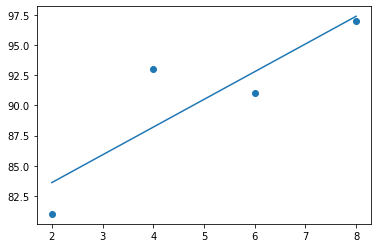

In [8]:
# 앞서 구한 기울기와 절편을 이용해 그래프를 그려 봄
y_pred = a * x_data + b
plt.scatter(x, y)
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
plt.show()

### 4. 다중선형 회귀란
* w 파라미터의 개수가 적다면 고차원 방정식으로 비용 함수가 되는 w 변숫값을 도출할 수 있겠지만, w 파라미터가 많으면 고차원 방정식을 동원하더라도 해결하기 어려움. 경사 하강법은 이러한 고차원 방정식에 대한 문제를 해결해주면서 비용 함수 RSS를 최소화하는 방법을 직관적으로 제공하는 뛰어난 방식.
* $R(w)$는 변수가 w 파라미터로 이루어진 함수.
$$R(w) = \displaystyle\sum_{i=1}^n(y_i-(w_0+w_1*x_i))^2$$
<center>

$\displaystyle\frac{\partial{R(w)}}{\partial{w_1}}=\frac{2}{N}\displaystyle\sum_{i=1}^n-x_i(y_i-(w_0+w_1x_i))=-\frac{2}{N}\displaystyle\sum_{i=1}^nx_i*$(실제값$_i-$예측값$_i$)

$\displaystyle\frac{\partial{R(w)}}{\partial{w_0}}=\frac{2}{N}\displaystyle\sum_{i=1}^n-(y_i-(w_0+w_1x_i))=-\frac{2}{N}\displaystyle\sum_{i=1}^n$(실제값$_i-$예측값$_i$)
</center>

* $w_1, w_0$의 편미분 결과값인 $-\frac{2}{N}\displaystyle\sum_{i=1}^nx_i*$(실제값$_i-$예측값$_i$) 와 $-\frac{2}{N}\displaystyle\sum_{i=1}^n$(실제값$_i-$예측값$_i$) 을 반복적으로 보정하면서 $w_1, w_0$값을 업데이트 하면 비용함수 $R(w)$가 최소가 되는 $w_1, w_0$값을 구할 수 있음. 하지만 실제로는 앞의 편미분 값이 너무 클 수 있기 때문에 보정계수 $\eta$를 곱함 $\rarr$ "학습률"
  * 새로운 $w_1 =$ 이전 $w_1 - \eta\frac{2}{N}\displaystyle\sum_{i=1}^nx_i*$(실제값$_i-$예측값$_i$)
  * 새로운 $w_0 =$ 이전 $w_0 - \eta\frac{2}{N}\displaystyle\sum_{i=1}^n$(실제값$_i-$예측값$_i$)
  * 비용 함수의 값이 감소했으면 다시 $w_1, w_0$를 업데이트 하여 다시 비용 함수의 값 계산. 더 이상 비용 함수의 값이 감소하지 않으면 그 때의 $w_1, w_0$를 구하고 반복을 중지함.
### 5. 코딩으로 확인하는 다중 선형 회귀

(100, 1) (100, 1)


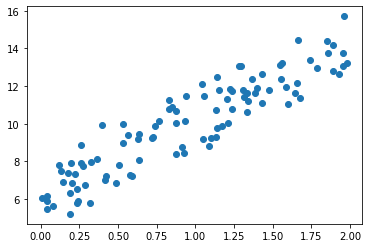

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

np.random.seed(0)
# y = 4X + 6 식을 근사(w1 = 4, w0 = 6). random 값은 Noise를 위해 만듦.
X = 2 * np.random.rand(100,1)
y = 6 + 4 * X + np.random.randn(100, 1)

# X , y 데이터 셋 scatter plot으로 시각화
print(X.shape, y.shape)
plt.scatter(X, y)

* $w_0$와 $w_1$의 값을 최소화 할 수 있도록 업데이트를 수행하는 함수 생성.
  * 예측 배열 y_pred는 np.dot(X,w1.T) + w0임. 100개의 데이터 X(1,2,$\dots$,100)이 있다면 예측값 $w_0 + X_1w_1 + X_2w_1 + \dots + X_{100}w_1$이며, 이는 입력 배열 X와 $w_1$ 배열의 내적임.
  * 새로운 $w_1$과 $w_0$를 update함

In [18]:
# w1과 w0 를 업데이트 할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01) :
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))

    # w1과 w0를 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [20]:
w0 = np.zeros((1,1))
w1 = np.zeros((1,1))
y_pred = np.dot(X, w1.T) + w0
diff = y - y_pred
print(diff.shape)

w0_factors = np.ones((100,1))
w1_update = -(2/100)*0.01*(np.dot(X.T, diff))
w0_update = -(2/100)*0.01*(np.dot(w0_factors.T, diff))
print(w1_update.shape, w0_update.shape)
w1, w0

(100, 1)
(1, 1) (1, 1)


(array([[0.]]), array([[0.]]))

* 반복적으로 경사 하강법을 이용하여 get_weight_updates()를 호출하여 $w_1$과 $w_0$를 업데이트 하는 함수 생성

In [22]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(X, y, iters=10000) :
    # w0와 w1을 모두 0으로 초기화.
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행
    for ind in tqdm(range(iters)) :
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

* 예측 오차 비용을 계산하는 함수 생성 및 경사 하강법 수행

In [24]:
def get_cost(y, y_pred) :
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print(f"w1:{w1[0,0]:.3f}, w0:{w0[0,0]:.3f}")
y_pred = w1[0,0] * X + w0
print(f"Gradient Descent Total Cost : {get_cost(y, y_pred):.4f}")

100%|██████████| 1000/1000 [00:00<00:00, 55429.62it/s]

w1:4.022, w0:6.162
Gradient Descent Total Cost : 0.9935


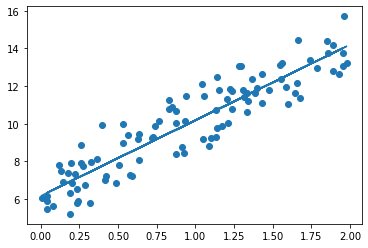

In [25]:
plt.scatter(X, y)
plt.plot(X, y_pred)

* 확률적 경사하강법 함수 작성

In [26]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000) :
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0

    for ind in tqdm(range(iters)) :
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, smaple_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]

        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [27]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print(f"w1 : {round(w1[0,0], 3)}, w0 : {round(w0[0,0], 3)}")
y_pred = w1[0,0] * X + w0
print(f"Stochastic Gradient Descent Total Cost : {get_cost(y, y_pred):.4f}")

100%|██████████| 1000/1000 [00:00<00:00, 31140.89it/s]

w1 : 4.028, w0 : 6.156
Stochastic Gradient Descent Total Cost : 0.9937


* 더 정확한 예측을 하려면 추가 정보를 입력해야 하며, 정보를 추가해 새로운 예측값을 구하려면 변수의 개수를 늘려 다중 선형 회귀를 만들어 주어야 함.